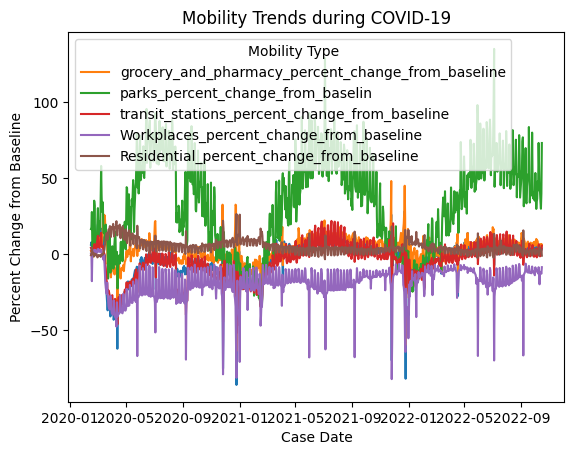

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'E:\\Mobility Covid\\Covid_joined_data.csv'
data = pd.read_csv(file_path)

# Convert 'case_dt' to datetime
data['case_dt'] = pd.to_datetime(data['case_dt'])

# Reshape the data, excluding the 'Report_dt' column
data = data.drop(columns=['Report_dt']).melt(id_vars=['case_dt'], var_name='Mobility', value_name='Percent_change_from_baseline')

# Draw the line plot
line_plot = sns.lineplot(data=data, x='case_dt', y='Percent_change_from_baseline', hue='Mobility')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percent Change from Baseline')

# Set the title
plt.title('Mobility Trends during COVID-19')

# Customize the legend
handles, labels = line_plot.get_legend_handles_labels()
line_plot.legend(handles[1:], labels[1:], title='Mobility Type')

# Show the plot
plt.show()



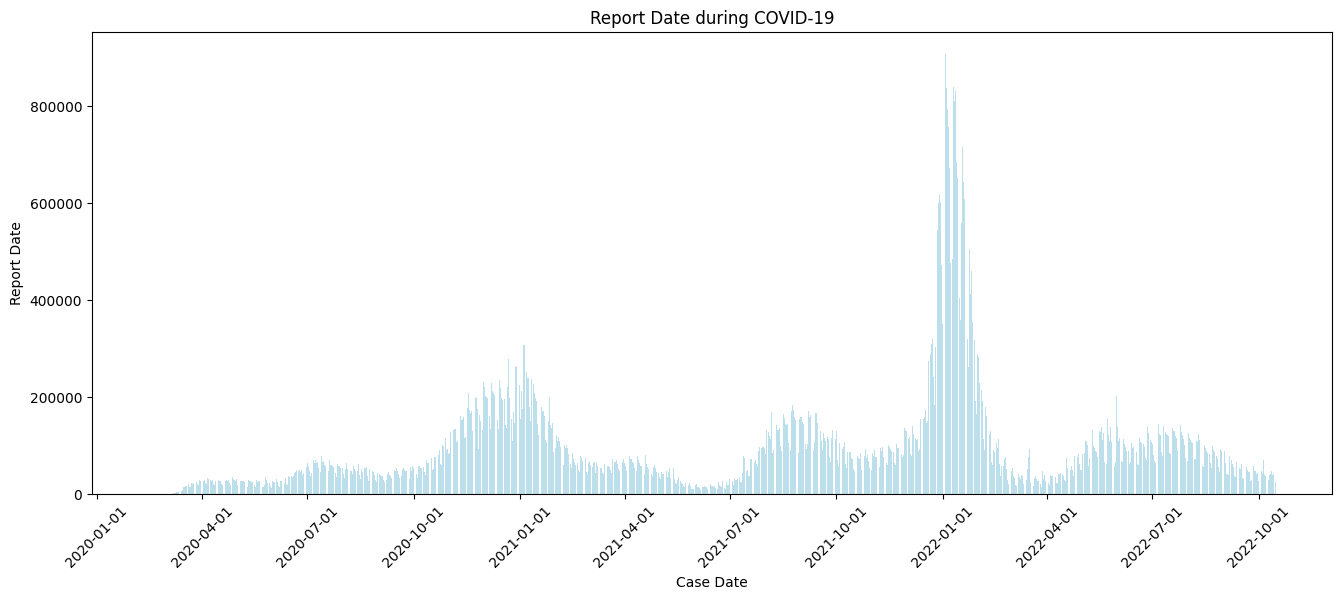

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file
file_path = 'E:\\Mobility Covid\\Covid_joined_data.csv'

# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Extract data for 'Report_dt'
bar_data = data[['case_dt', 'Report_dt']]

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a bar plot for the 'Report_dt' column
plt.bar(bar_data['case_dt'], bar_data['Report_dt'], color='lightblue', alpha=0.8)

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Report Date')

# Set the title
plt.title('Report Date during COVID-19')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


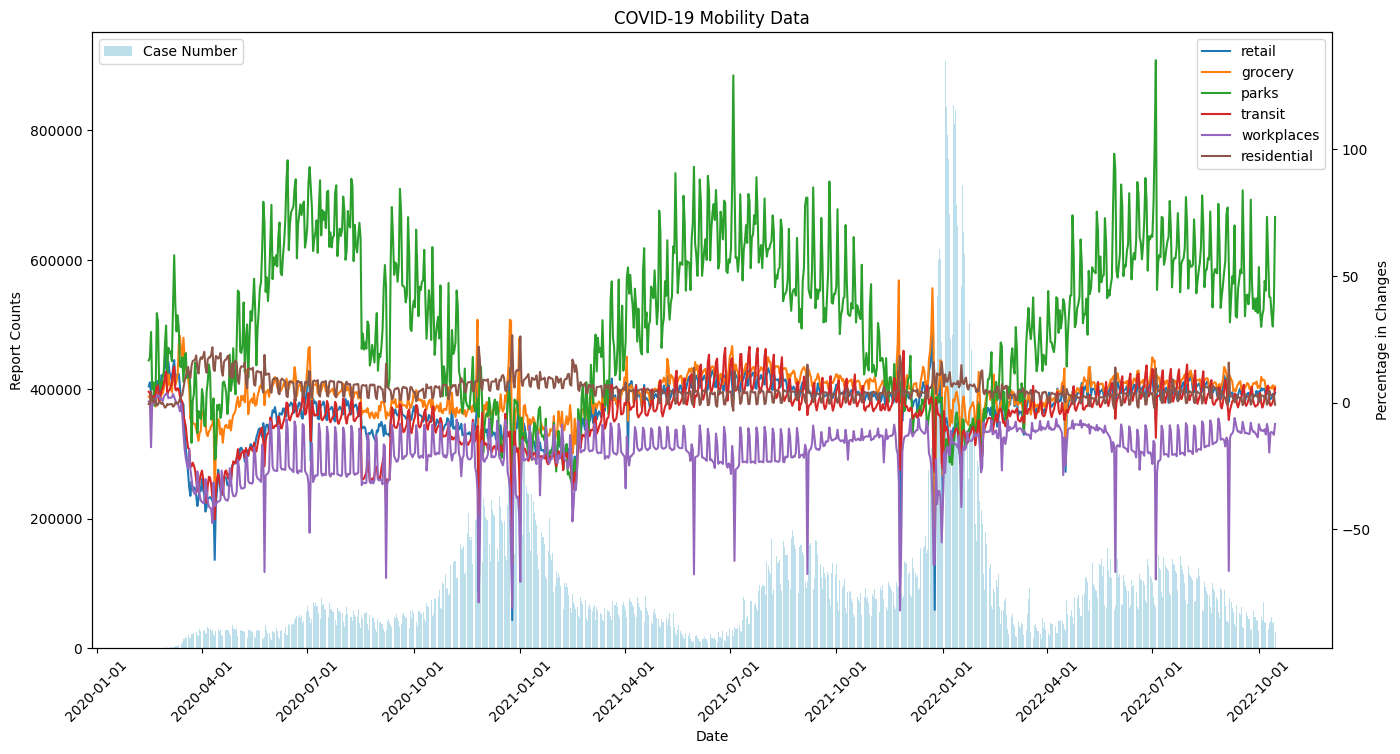

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file
file_path = 'E:\\Mobility Covid\\Covid_joined_data.csv'

# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Extract data for 'Report_dt'
bar_data = data[['case_dt', 'Report_dt']]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the left y-axis
ax1 = plt.gca()

# Create a bar plot for the 'Report_dt' column
ax1.bar(bar_data['case_dt'], bar_data['Report_dt'], color='lightblue', alpha=0.8, label='Case Number')

# Set the x-axis label
ax1.set_xlabel('Date')

# Set the y-axis label
ax1.set_ylabel('Report Counts')

# Set the title
ax1.set_title('COVID-19 Mobility Data (Daily)')

# Format x-axis tick labels for every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create the right y-axis
ax2 = ax1.twinx()

# Add line plots for other columns
line_columns = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baselin',
    'transit_stations_percent_change_from_baseline',
    'Workplaces_percent_change_from_baseline',
    'Residential_percent_change_from_baseline'
]

for col in line_columns:
    ax2.plot(data['case_dt'], data[col], label=col.split('_')[0].lower())  # Multiply by 100 to convert to percentages

# Set the right y-axis label
ax2.set_ylabel('Percentage in Changes')

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


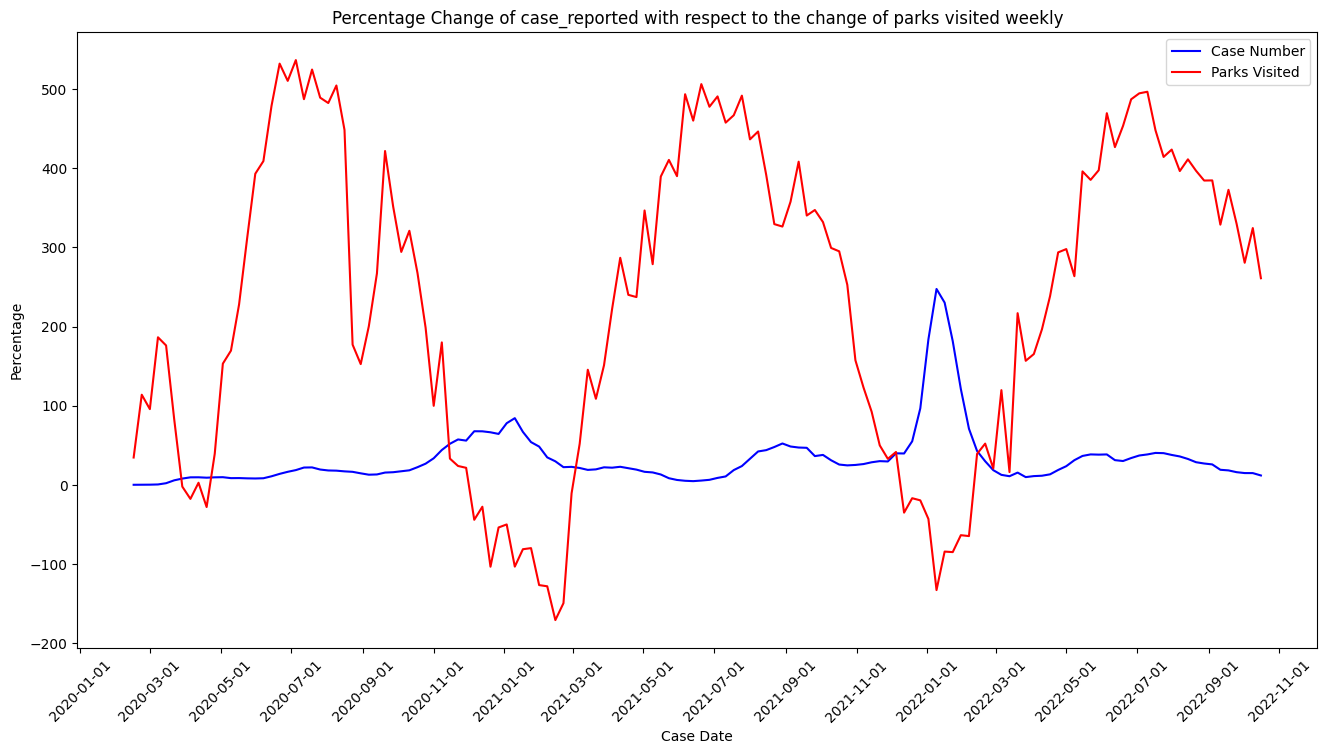

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file
file_path = 'E:\\Mobility Covid\\Covid_joined_data.csv'

# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'parks_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'parks_percent_change_from_baselin']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['parks_percent_change_from_baselin'], label='Parks Visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of parks visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [53]:
# Calculate the correlation between 'report_num_change' and 'parks_percent_change_from_baselin'
correlation = weekly_data['report_num_change'].corr(weekly_data['parks_percent_change_from_baselin'])

print(f"Correlation between 'report_num_change' and 'parks_percent_change_from_baselin': {correlation:.2f}")

Correlation between 'report_num_change' and 'parks_percent_change_from_baselin': -0.41


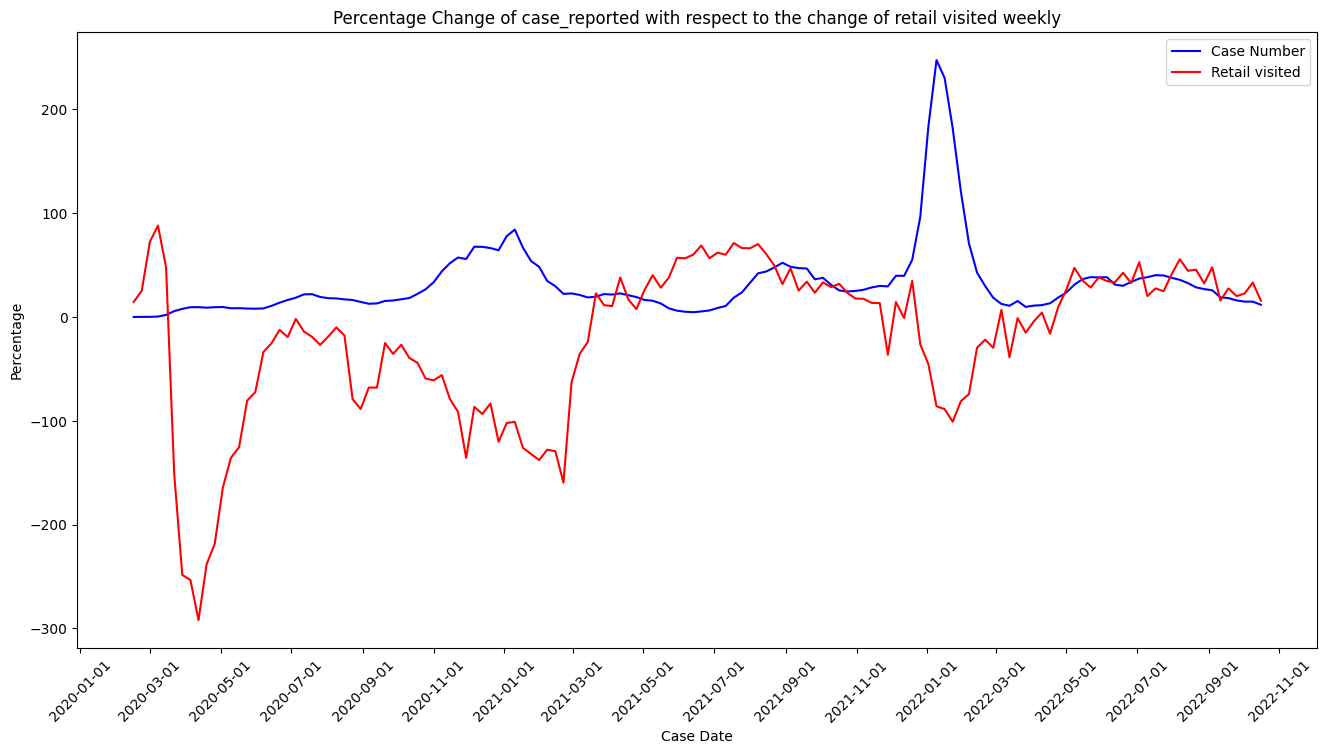

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file
file_path = 'E:\\Mobility Covid\\Covid_joined_data.csv'

# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

# Calculate the weekly sum of 'Report_dt' and 'retails_percent_change_from_baselin' values
weekly_data = data[['Report_dt', 'retail_and_recreation_percent_change_from_baseline']].resample('W').sum()

# Calculate the percentage change in the weekly 'Report_dt' values with respect to the first week
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

# Reset the index
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the weekly percentage change of 'Report_dt'
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')

# Plot the weekly sum of 'parks_percent_change_from_baselin'
plt.plot(weekly_data['case_dt'], weekly_data['retail_and_recreation_percent_change_from_baseline'], label='Retail visited', color='red')

# Set the x-axis label
plt.xlabel('Case Date')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage Change of case_reported with respect to the change of retail visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [60]:
# Calculate the correlation between 'report_num_change' and 'parks_percent_change_from_baselin'
correlation = weekly_data['report_num_change'].corr(weekly_data['retail_and_recreation_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'retail_and_recreation_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'retail_and_recreation_percent_change_from_baseline': -0.17
